## 2) Salary_hike -> Build a prediction model for Salary_hike
## Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import metrics

In [2]:
#import dataset
s_data=pd.read_csv('Salary_Data.csv')
s_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## EDA

In [3]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
s_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Visulization of Data

C:\Users\hmaca\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

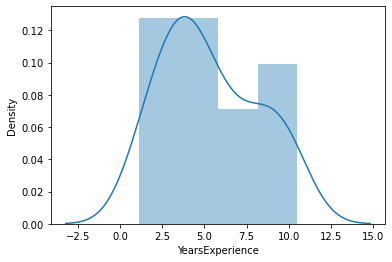

In [5]:
sns.distplot(s_data['YearsExperience'])

C:\Users\hmaca\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

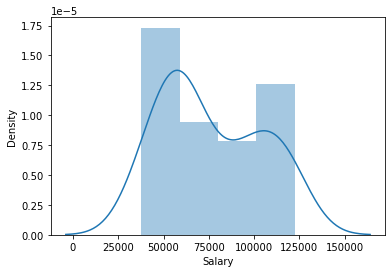

In [6]:
sns.distplot(s_data['Salary'])

## Hence their is no outlier present in dataset

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

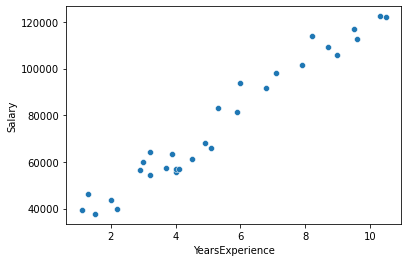

In [7]:
sns.scatterplot(x=s_data['YearsExperience'],y=s_data['Salary'])

## As we show that , increase in YearsExperience leads to increase in Salary

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

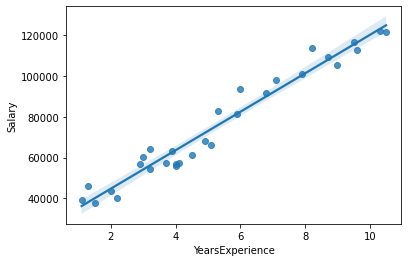

In [8]:
sns.regplot(x='YearsExperience',y='Salary',data=s_data)

## Correlation

In [9]:
s_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## There is very strong correlation 

# Building Model

In [10]:
model=smf.ols('Salary~YearsExperience', data=s_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           1.14e-20
Time:                        08:03:01   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
#prediction of dataset
predict_salary=model.predict(s_data.YearsExperience)
pred_data=pd.DataFrame({'Actual_Salary':s_data.Salary,'Predicted_Salary':predict_salary})
pred_data.head()


,Actual_Salary,Predicted_Salary
0,39343.0,36187.158752
1,46205.0,38077.151217
2,37731.0,39967.143681
3,43525.0,44692.124842
4,39891.0,46582.117306


In [12]:
#calculating errors
print('Mean Absolute Error',metrics.mean_absolute_error(s_data.Salary,predict_salary))
print('Mean Squared Error',metrics.mean_squared_error(s_data.Salary,predict_salary))
print('Root Mean Squared Error ',np.sqrt(metrics.mean_squared_error(s_data.Salary,predict_salary)))

Mean Absolute Error 4644.20128944354
Mean Squared Error 31270951.72228097
Root Mean Squared Error  5592.043608760662


## Building Model with log Transformation

In [13]:
data1=pd.DataFrame.copy(s_data)
data1['log_YE']=np.log(data1.YearsExperience)
data1.head()

,YearsExperience,Salary,log_YE
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457


C:\Users\hmaca\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_YE', ylabel='Density'>

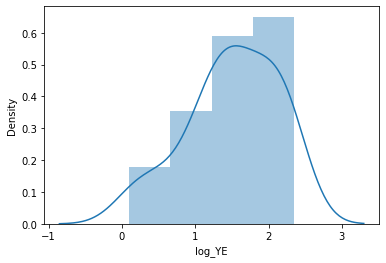

In [14]:
sns.distplot(data1['log_YE'])

In [15]:
log_model=smf.ols('Salary~log_YE', data=data1).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           3.25e-13
Time:                        08:03:01   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_YE      4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='log_YE', ylabel='Salary'>

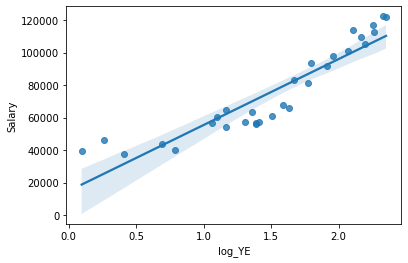

In [16]:
sns.regplot(x='log_YE',y='Salary',data=data1)

In [17]:
#prediction of data
log_predict=log_model.predict(data1.log_YE)
pred_log=pd.DataFrame({'Actual_Salary':data1.Salary,'log_Predicted_Salary':log_predict})
pred_log.head()

,Actual_Salary,log_Predicted_Salary
0,39343.0,18795.848339
1,46205.0,25575.235192
2,37731.0,31382.551905
3,43525.0,43057.262306
4,39891.0,46925.138875


In [18]:
#error calculation
print('Mean Absolute Error',metrics.mean_absolute_error(data1.Salary,log_predict))
print('Mean Squared Error',metrics.mean_squared_error(data1.Salary,log_predict))
print('root Mean Squared Error',np.sqrt(metrics.mean_squared_error(data1.Salary,log_predict)))

Mean Absolute Error 8443.584664486356
Mean Squared Error 106149618.72183888
root Mean Squared Error 10302.893706228308


## Building Model with square root transformation

In [25]:
data2=pd.DataFrame.copy(s_data)
data2['sqrt_YE']=np.sqrt(data2.YearsExperience)
data2.head()

,YearsExperience,Salary,sqrt_YE
0,1.1,39343.0,1.048809
1,1.3,46205.0,1.140175
2,1.5,37731.0,1.224745
3,2.0,43525.0,1.414214
4,2.2,39891.0,1.483240


C:\Users\hmaca\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqrt_YE', ylabel='Density'>

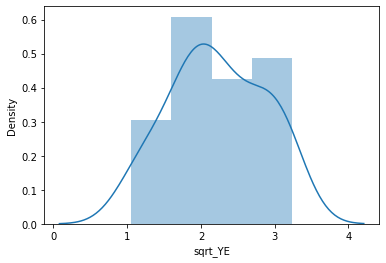

In [26]:
sns.distplot(data2['sqrt_YE'])

In [27]:
sqrt_model=smf.ols('Salary~sqrt_YE', data=data2).fit()
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           8.57e-18
Time:                        08:09:09   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
sqrt_YE      4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='sqrt_YE', ylabel='Salary'>

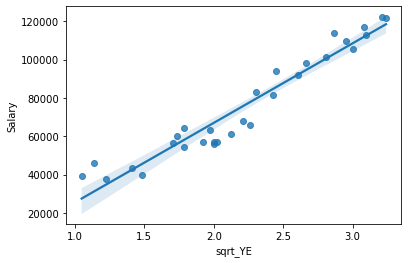

In [28]:
sns.regplot(x='sqrt_YE',y='Salary',data=data2)

In [30]:
#prediction of data
sqrt_predict=sqrt_model.predict(data2.sqrt_YE)
pred_sqrt=pd.DataFrame({'Actual_Salary':data2.Salary,'sqrt_Predicted_Salary':sqrt_predict})
pred_sqrt.head()

,Actual_Salary,sqrt_Predicted_Salary
0,39343.0,27470.511884
1,46205.0,31262.287009
2,37731.0,34771.976586
3,43525.0,42635.056211
4,39891.0,45499.687794


In [32]:
#error calculation
print('Mean Absolute Error',metrics.mean_absolute_error(data2.Salary,sqrt_predict))
print('Mean Squared Error',metrics.mean_squared_error(data2.Salary,sqrt_predict))
print('root Mean Squared Error',np.sqrt(metrics.mean_squared_error(data2.Salary,sqrt_predict)))

Mean Absolute Error 5846.985396675182
Mean Squared Error 50127755.61652503
root Mean Squared Error 7080.09573498304


## Building Model with reciprocal transformation

In [36]:
data3=pd.DataFrame.copy(s_data)
data3['rec_YE']=np.reciprocal(data3.YearsExperience)
data3.head()


,YearsExperience,Salary,rec_YE
0,1.1,39343.0,0.909091
1,1.3,46205.0,0.769231
2,1.5,37731.0,0.666667
3,2.0,43525.0,0.500000
4,2.2,39891.0,0.454545


C:\Users\hmaca\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rec_YE', ylabel='Density'>

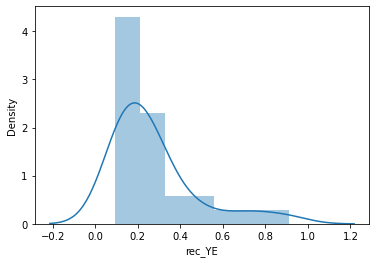

In [37]:
sns.distplot(data3['rec_YE'])

In [50]:
rec_model=smf.ols('Salary~rec_YE',data=data3).fit()
rec_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     40.06
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           7.58e-07
Time:                        08:31:49   Log-Likelihood:                -335.30
No. Observations:                  30   AIC:                             674.6
Df Residuals:                      28   BIC:                             677.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.043e+05   5533.996     18.842      0.000    9.29e+04    1.16e+05
rec_YE     -1.036e+05   1.64e+04     -6.329      0.000   -1.37e+05   -7.01e+04
==============================================================================
Omnibus:                       10.284   Durbin-Watson:                   0.220
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                2.740
Skew:                           0.290   Prob(JB):                        0.254
Kurtosis:                       1.638   Cond. No.                         5.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='rec_YE', ylabel='Salary'>

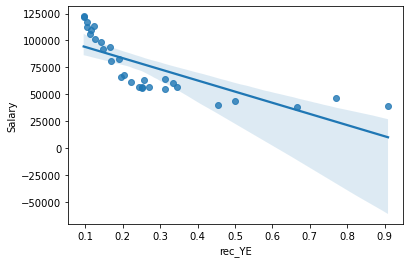

In [40]:
sns.regplot(x='rec_YE',y="Salary",data=data3)

In [51]:
#prediction of data
rec_predict=rec_model.predict(data3.rec_YE)
rec_sqrt=pd.DataFrame({'Actual_Salary':data3.Salary,'rec_Predicted_Salary':rec_predict})
rec_sqrt.head()

,Actual_Salary,rec_Predicted_Salary
0,39343.0,10072.567925
1,46205.0,24564.993646
2,37731.0,35192.772508
3,43525.0,52462.913159
4,39891.0,57172.951518


In [54]:
#error calculation
print('Mean Absolute Error',metrics.mean_absolute_error(data3.Salary,rec_predict))
print('Mean Squared Error',metrics.mean_squared_error(data3.Salary,rec_predict))
print('root Mean Squared Error',np.sqrt(metrics.mean_squared_error(data3.Salary,rec_predict)))

Mean Absolute Error 15486.487173181742
Mean Squared Error 298885351.11552125
root Mean Squared Error 17288.30098984632


## Building Model with square transformation

In [44]:
data4=pd.DataFrame.copy(s_data)
data4['sqre_YE']=(data4.YearsExperience)**2
data4


,YearsExperience,Salary,sqre_YE
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00
4,2.2,39891.0,4.84
5,2.9,56642.0,8.41
6,3.0,60150.0,9.00
7,3.2,54445.0,10.24
8,3.2,64445.0,10.24
9,3.7,57189.0,13.69


In [46]:
sqr_model=smf.ols('Salary~sqre_YE',data=data4).fit()
sqr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           1.52e-16
Time:                        08:26:51   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.804e+04   2186.372     21.974      0.000    4.36e+04    5.25e+04
sqre_YE      776.3188     44.624     17.397      0.000     684.911     867.726
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.240
Skew:                           0.409   Prob(JB):                        0.538
Kurtosis:                       2.432   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='sqre_YE', ylabel='Salary'>

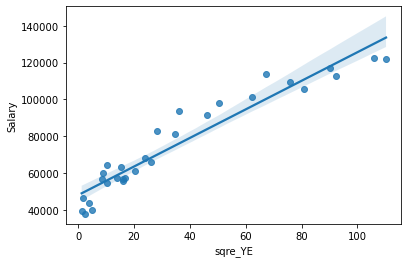

In [48]:
sns.regplot(x='sqre_YE',y='Salary',data=data4)

In [52]:
#prediction of data
sqr_predict=sqr_model.predict(data4.sqre_YE)
pred_sqr=pd.DataFrame({'Actual_Salary':data4.Salary,'sqr_Predicted_Salary':sqr_predict})
pred_sqr.head()

,Actual_Salary,sqr_Predicted_Salary
0,39343.0,48981.931230
1,46205.0,49354.564241
2,37731.0,49789.302755
3,43525.0,51147.860608
4,39891.0,51799.968377


In [53]:
#error calculation
print('Mean Absolute Error',metrics.mean_absolute_error(data4.Salary,sqr_predict))
print('Mean Squared Error',metrics.mean_squared_error(data4.Salary,sqr_predict))
print('root Mean Squared Error',np.sqrt(metrics.mean_squared_error(data4.Salary,sqr_predict)))

Mean Absolute Error 6510.367927098576
Mean Squared Error 61520040.46050556
root Mean Squared Error 7843.471199698865


In [59]:
model_data={'Prep_Models':['Model','log_Model','sqrt_Model','rec_model','sqr_model'],'Rsquared':[model.rsquared,log_model.rsquared,sqrt_model.rsquared,rec_model.rsquared,sqr_model.rsquared]}
table=pd.DataFrame(model_data)
table

,Prep_Models,Rsquared
0,Model,0.956957
1,log_Model,0.853889
2,sqrt_Model,0.931001
3,rec_model,0.588595
4,sqr_model,0.915320


## Here Model  is the higest R_squared value

### Prediction for new data points for our Model

In [62]:
new_data=pd.Series([1,5.6,11,15])
new_data

0     1.0
1     5.6
2    11.0
3    15.0
dtype: float64

In [65]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,1.0
1,5.6
2,11.0
3,15.0


In [66]:
model.predict(data_pred)

0     35242.162520
1     78711.989199
2    129741.785735
3    167541.635020
dtype: float64